In [2]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)

In [6]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(
    market_data_scaled,
    columns=market_data_df.columns,
    index=market_data_df.index
)

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()


# Set the coinid column as index
#The index is already set to 'coin_id' from the previous step, 
# so we don't need to set it again. But if you want to confirm:
market_data_scaled_df.index.name = 'coin_id'


# Display sample data
market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
#   2. Fit the model to the data using the scaled DataFrame
    model.fit(market_data_scaled_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


    k     inertia
0   1  287.000000
1   2  212.123342
2   3  170.193571
3   4   79.022435
4   5   71.097914
5   6   66.108827
6   7   54.488123
7   8   43.224693
8   9   32.860884
9  10   28.404885


<Figure size 1200x800 with 0 Axes>

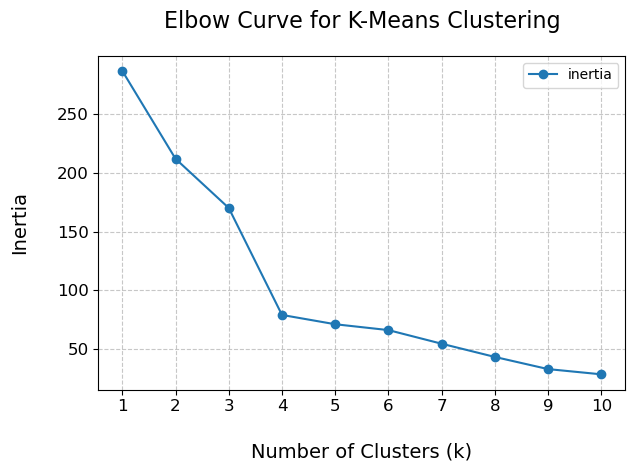

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Create the plot
plt.figure(figsize=(12, 8))
ax = elbow_df.plot(x="k", y="inertia", kind="line", marker="o")

# Customize the plot
plt.title("Elbow Curve for K-Means Clustering", fontsize=16, pad=20)
plt.xlabel("Number of Clusters (k)", fontsize=14, labelpad=20)
plt.ylabel("Inertia", fontsize=14, labelpad=20)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()

# Customize tick labels
plt.xticks(k_values, fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for the first and last points
first_point = elbow_df.iloc[0]
last_point = elbow_df.iloc[-1]

plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the elbow plot, k-4 seems to be appropriated

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
best_k = 4  
km_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the K-Means model using the scaled data
km_model.fit(market_data_scaled_df)

# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = km_model.predict(market_data_scaled_df)

In [10]:
# View the resulting array of cluster values.
print(clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [11]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = km_model.labels_

# Display sample data
clustered_df.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,class
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,0
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,0
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,0
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,0


<Axes: title={'center': 'Crypto Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

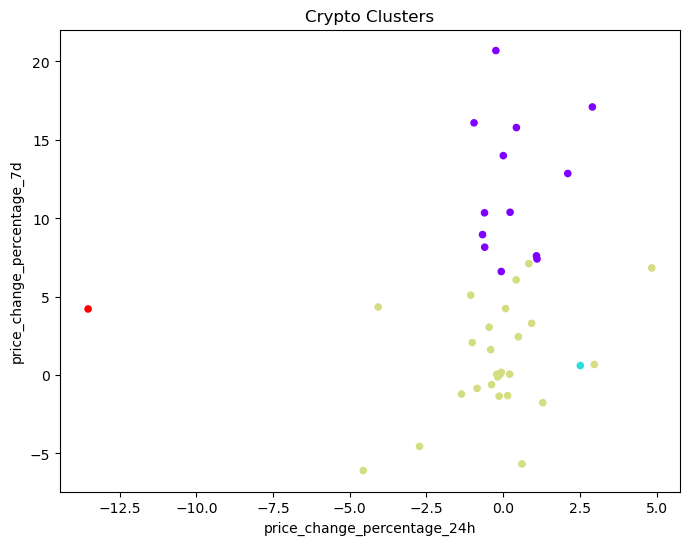

In [16]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot(
    kind="scatter",
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="class",
    colormap="rainbow",
    colorbar=False,
    figsize=(8, 6),
    title="Crypto Clusters"
)

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame.
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [20]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


In [22]:
# Calculate total explained variance
total_explained_variance = sum(explained_variance)
print(total_explained_variance)

0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  This distribution suggests that the first two components are almost equally important, with the third component contributing a significant but smaller amount of information. In the context of your cryptocurrency analysis, this means that these three principal components capture the majority of the patterns and relationships in your original dataset. When you perform clustering or other analyses using these components, you're working with a simplified representation of the data that still retains most of the important information about how the cryptocurrencies relate to each other in terms of their price fluctuations across various timeframes.

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PC1", "PC2", "PC3"],
    index=market_data_df.index
)

# Creating a DataFrame with the PCA data
pca_df.head()

# Copy the crypto names from the original data
crypto_names = market_data_df.index.copy()

# Set the coinid column as index
pca_df.index.name = 'coin_id'

# Display sample data
pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using PCA DataFrame
    model.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head()

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901


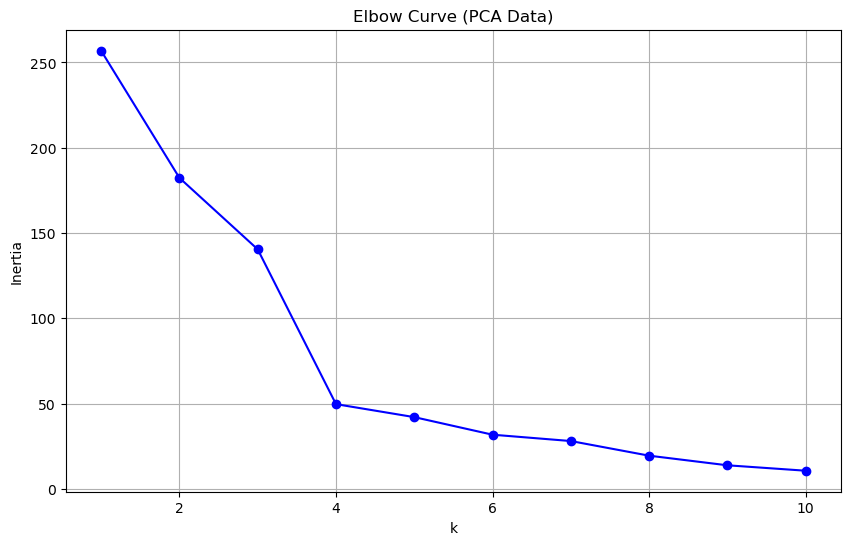

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Curve (PCA Data)")
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on the elbow plot, k-4 seems to be appropriated


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, We used 4 components to find the best k value, which is different from the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialize the K-Means model using the best value for k
best_k = 4
km_model = KMeans(n_clusters=best_k, random_state=42)


In [28]:
# Fit the K-Means model using the PCA data
km_model.fit(pca_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = km_model.predict(pca_df)

# Print the resulting array of cluster values.


In [30]:
# Create a copy of the DataFrame with the PCA data
clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df["class"] = km_model.labels_

# Display sample data
clustered_df.head(10)

,PC1,PC2,PC3,class
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


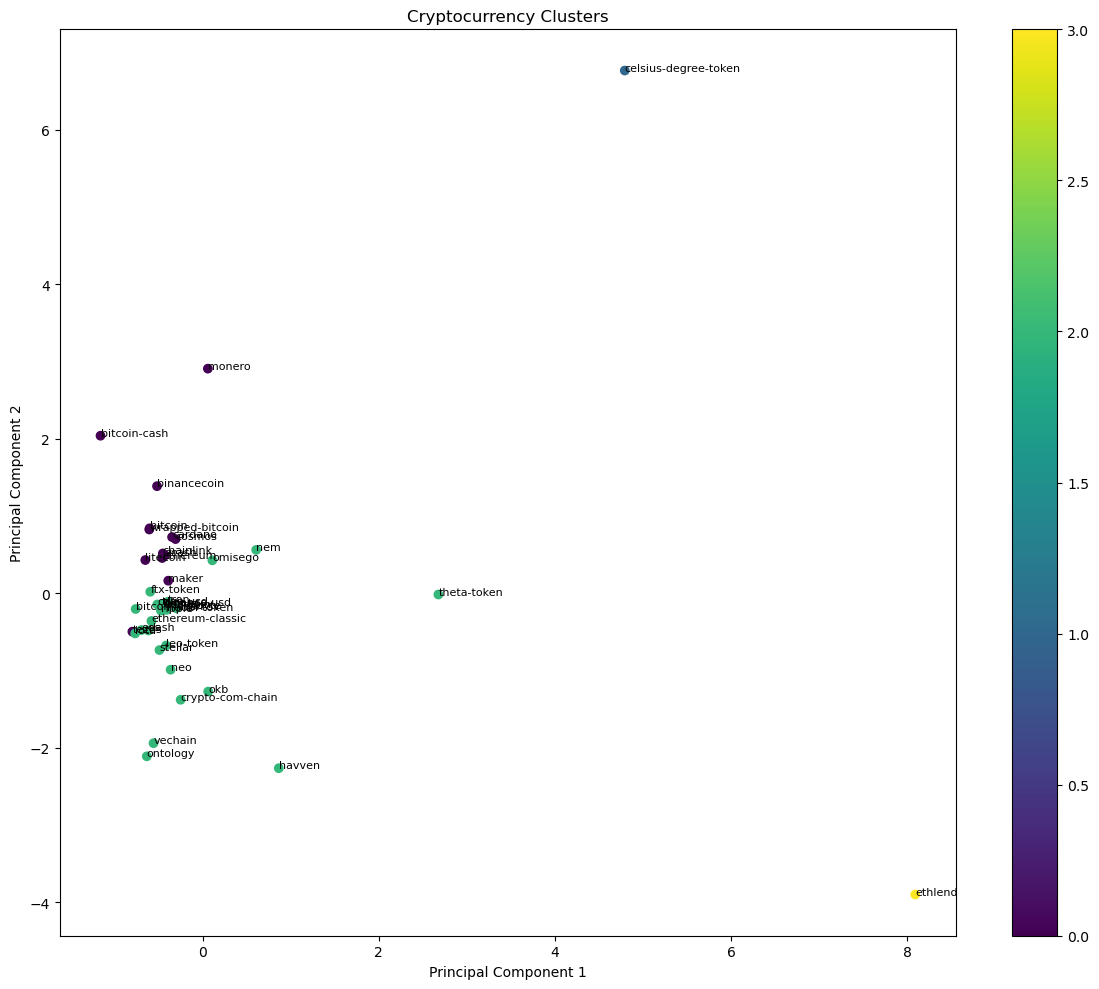

In [39]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
# Use "class" for the color to better visualize the data.

plt.figure(figsize=(12, 10))
scatter = plt.scatter(clustered_df['PC1'], 
                      clustered_df['PC2'], 
                      c=clustered_df['class'], 
                      cmap='viridis')

plt.title('Cryptocurrency Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a color bar
plt.colorbar(scatter)

# Add labels for each point
for i, txt in enumerate(clustered_df.index):
    plt.annotate(txt, (clustered_df['PC1'].iloc[i], clustered_df['PC2'].iloc[i]), fontsize=8)

plt.tight_layout()
plt.show()

### Determine the Weights of Each Feature on each Principal Component

In [40]:
# Use the columns from the original scaled DataFrame as the index.
pca_df.index = market_data_scaled_df.index


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The features with the strongest influence on each component are:

PC1: Strongly influenced by long-term changes (200-day and 1-year), contrasted with 24-hour changes.

PC2: Dominated by medium-term trends (14-day, 30-day, and 60-day changes).

PC3: Heavily influenced by 7-day changes, with some impact from 14-day and 60-day changes.

Each component captures price changes over different timeframes, allowing for classification of cryptocurrencies based on their short-term, medium-term, and long-term price behaviors.
    

In [42]:
#to help answer the question, we can use the following code to display the first five rows of the DataFrame.
# Get the feature names
feature_names = market_data_df.columns

# Create a DataFrame of the PCA components
pca_components = pd.DataFrame(
    data=pca.components_.T,  # Transpose to get features as rows
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

# Display the absolute values of component loadings
print("Absolute values of PCA component loadings:")
print(pca_components.abs())

# Find the features with the strongest influence on each component
n_top_features = 3  # Number of top features to display for each component

for col in pca_components.columns:
    print(f"\nTop {n_top_features} features for {col}:")
    top_features = pca_components[col].abs().nlargest(n_top_features)
    for feature, value in top_features.items():
        print(f"{feature}: {pca_components.loc[feature, col]:.4f}")

Absolute values of PCA component loadings:
                                   PC1       PC2       PC3
price_change_percentage_24h   0.416728  0.358162  0.218795
price_change_percentage_7d    0.102432  0.227432  0.787670
price_change_percentage_14d   0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182  0.181744
price_change_percentage_60d   0.320365  0.434040  0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379  0.150789  0.210541

Top 3 features for PC1:
price_change_percentage_200d: 0.5945
price_change_percentage_1y: 0.5684
price_change_percentage_24h: -0.4167

Top 3 features for PC2:
price_change_percentage_30d: 0.5622
price_change_percentage_14d: 0.5404
price_change_percentage_60d: 0.4340

Top 3 features for PC3:
price_change_percentage_7d: 0.7877
price_change_percentage_60d: -0.3614
price_change_percentage_14d: 0.3495
